Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [ ]:
x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

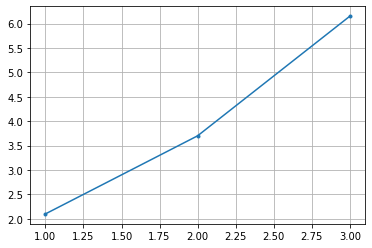

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10] # 약간의 noise 추가
#y = 2x
y_train = [3, 5, 7, 9, 11]
#y = 2x + 1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

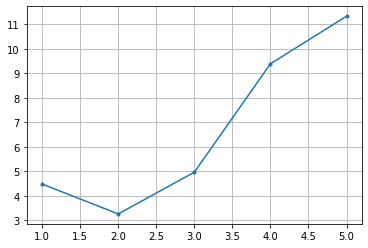

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
x_train = [1, 2, 3]
y_train = [3, 5, 7] # 약간의 noise 추가
signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

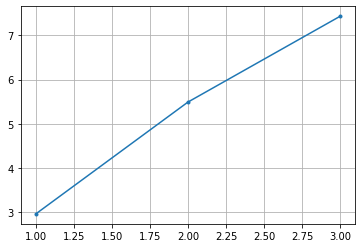

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
x_train = [1, 2, 3]
y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

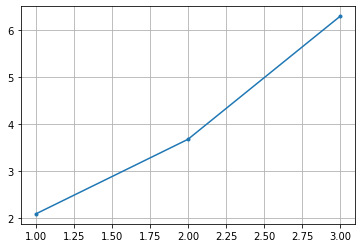

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
x_train = [1, 2, 3, 4]
y_train = [-2, 1, 4, 7] # y=3x-5
signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

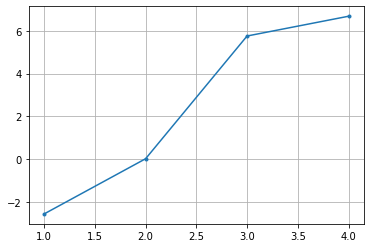

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [ ]:
x_train = [1, 2, 3, 4, 5, 6]
y_train = [4.2, 5.4, 6.6, 7.8, 9.0, 10.2] # y=1.2x+3
signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

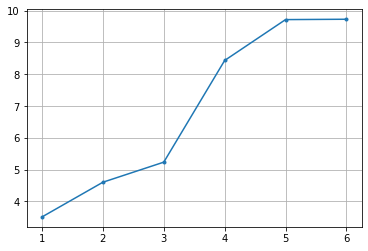

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [ ]:
useRandom = False

In [ ]:
if useRandom:
  W = tf.Variable(tf.random_normal([1]), name='weight') #초기값 랜덤 생성
  b = tf.Variable(tf.random_normal([1]), name='bias')
else:
  w0 = 7.0;
  b0 = 5.0;

  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis XW+b**
$$ H(x)=Wx + b $$

In [ ]:
hypothesis = x_train * W + b # W는 기울기, b는 절편bias

**cost/loss function 정의하기**

* loss of one training example :$$ loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1} $$

In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #w, b를 결정을 해주는,변화시켜가는 녀석
train = optimizer.minimize(loss) #loss 뺀거 다 더한거 평균낸거 최소화

**Launch the graph in a session**

In [ ]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [ ]:
sess.run(tf.global_variables_initializer()) #초기화

In [ ]:
nb_epoch = 3001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)[0] # 기울기
    b1 = sess.run(b)[0] # bias    
    vw.append(w1)
    vb.append(b1)
        

    if step % 100 == 0: # 100번마다
        
        print(step,'\t', loss1,'\t', w1,'\t', b1)

0 	 279.758 	 5.0904775 	 4.5474553
100 	 0.7024765 	 1.1444939 	 3.0807073
200 	 0.5656293 	 1.2282497 	 2.7221324
300 	 0.49976182 	 1.2863572 	 2.4733632
400 	 0.46805856 	 1.32667 	 2.300775
500 	 0.45279947 	 1.3546383 	 2.1810374
600 	 0.44545487 	 1.3740418 	 2.0979676
700 	 0.44191933 	 1.3875035 	 2.0403354
800 	 0.44021776 	 1.3968428 	 2.0003514
900 	 0.439399 	 1.4033223 	 1.9726117
1000 	 0.43900475 	 1.4078174 	 1.9533672
1100 	 0.43881488 	 1.4109362 	 1.9400152
1200 	 0.43872377 	 1.4130999 	 1.9307522
1300 	 0.43867972 	 1.4146008 	 1.9243262
1400 	 0.43865857 	 1.4156423 	 1.9198676
1500 	 0.43864837 	 1.4163647 	 1.916775
1600 	 0.43864346 	 1.4168658 	 1.914629
1700 	 0.43864122 	 1.4172136 	 1.9131402
1800 	 0.4386401 	 1.4174548 	 1.9121075
1900 	 0.43863952 	 1.4176222 	 1.911391
2000 	 0.4386394 	 1.4177382 	 1.9108938
2100 	 0.43863893 	 1.4178189 	 1.9105489
2200 	 0.43863893 	 1.4178748 	 1.9103096
2300 	 0.43863916 	 1.4179137 	 1.9101435
2400 	 0.4386388 	 

Text(0, 0.5, 'loss')

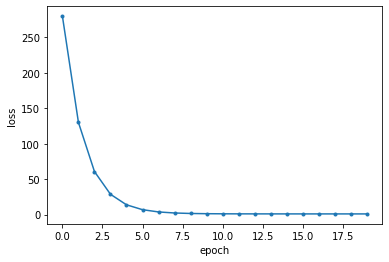

In [ ]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

**TODO:w, b의 epoch에 따른 변화 그래프 넣기!**

Text(0, 0.5, 'W')

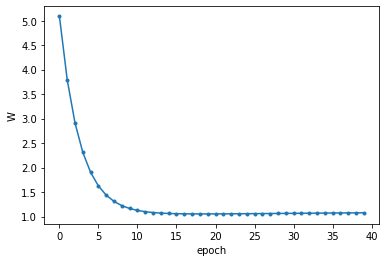

In [ ]:
plt.plot(vw[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('W')

Text(0, 0.5, 'b')

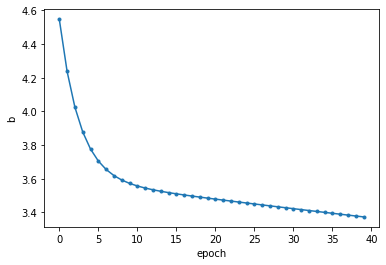

In [ ]:
plt.plot(vb[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('b')

**학습완료**

In [ ]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

**출력해보기**

In [ ]:
print(w1, b1)

1.4179941 1.9097981


In [ ]:
strl = 'y = ' + str(w1) +'x + ' + str(b1)
print(strl)

y = 1.4179941x + 1.9097981


Text(0.5, 1.0, 'y = 1.183659x + 2.4232016')

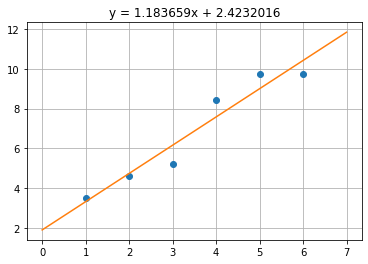

In [ ]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

**스스로 해보기**

아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다.

* 예1) 노이즈를 다르게 준다

    x_train = [1, 2, 3]
  
    y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.

    y=3x-5 

    y=1.2x + 3

* 예4) 초기값인 w0, b0를 다르게 설정해본다.

    w0 = 7.0;

    b0 = 5.0;